In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew


In [2]:
#read dataset
df=pd.read_csv("HR-Employee-Attrition.csv")

In [3]:
#show data
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
#no. of rows and columns
df.shape

(1470, 35)

In [5]:
# checking for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
#checking for datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
#checking for count ,min ,max etc.
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
#all column names
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
df['Attrition'].value_counts()


No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

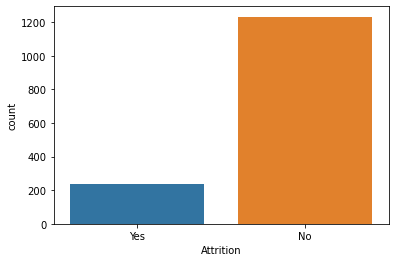

In [10]:
sns.countplot(df['Attrition'])

In [11]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

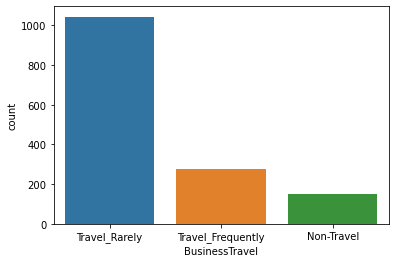

In [12]:
sns.countplot(df['BusinessTravel'])

In [13]:
df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

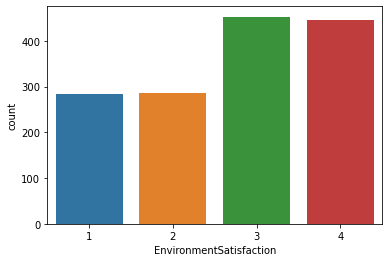

In [14]:
sns.countplot(df['EnvironmentSatisfaction'])

In [15]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

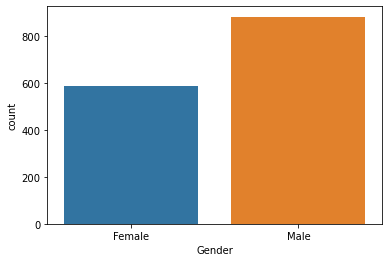

In [16]:
sns.countplot(df['Gender'])

In [17]:
df['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

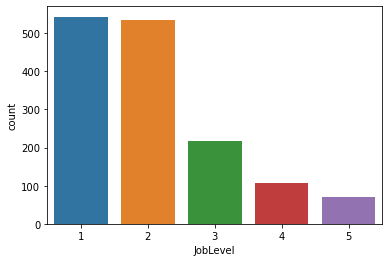

In [18]:
sns.countplot(df['JobLevel'])

In [19]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

<AxesSubplot:xlabel='JobRole', ylabel='count'>

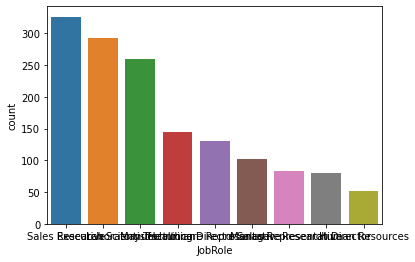

In [20]:
sns.countplot(df['JobRole'])

In [21]:
df['JobSatisfaction'].value_counts()


4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

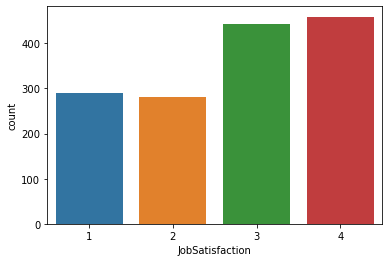

In [22]:
sns.countplot(df['JobSatisfaction'])

<AxesSubplot:>

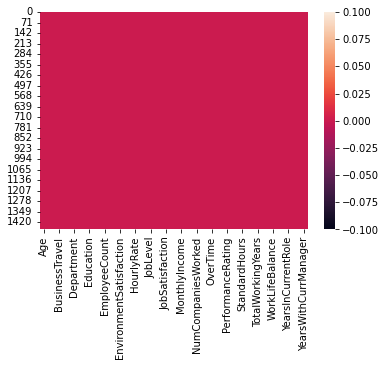

In [23]:
#heatmap for null values
sns.heatmap(df.isnull())

In [24]:
#show first five rows of dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# categorical features

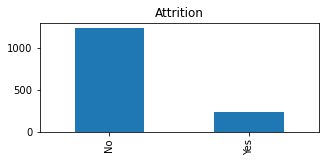

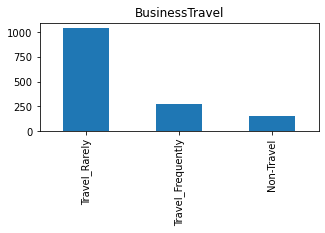

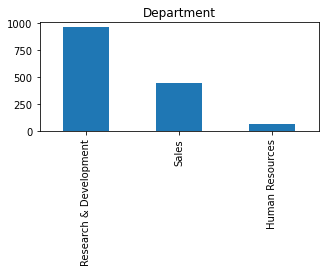

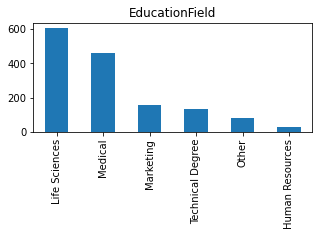

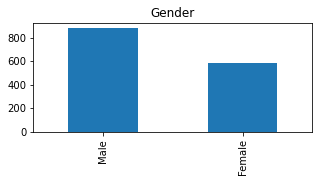

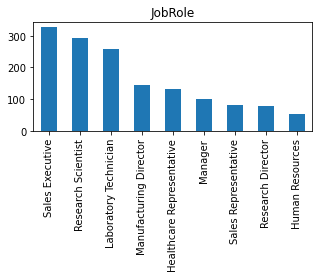

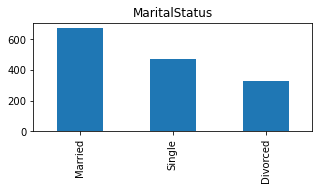

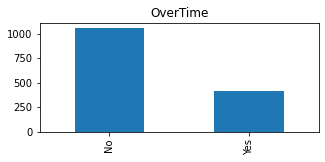

In [25]:
categorical = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime']
for i in categorical:
    df[i].value_counts().plot(kind='bar' ,figsize = (5, 2),title=i)
    plt.show()

In [26]:
#checking for skewness of data
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [27]:
#drop the less used columns
df.drop(['Over18', 'EmployeeNumber', 'StandardHours', 'EmployeeCount'], axis=1, inplace=True)

In [28]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [29]:
df['HourlyRate'].nunique()

71

In [30]:
df['PercentSalaryHike'].nunique()

15

<AxesSubplot:>

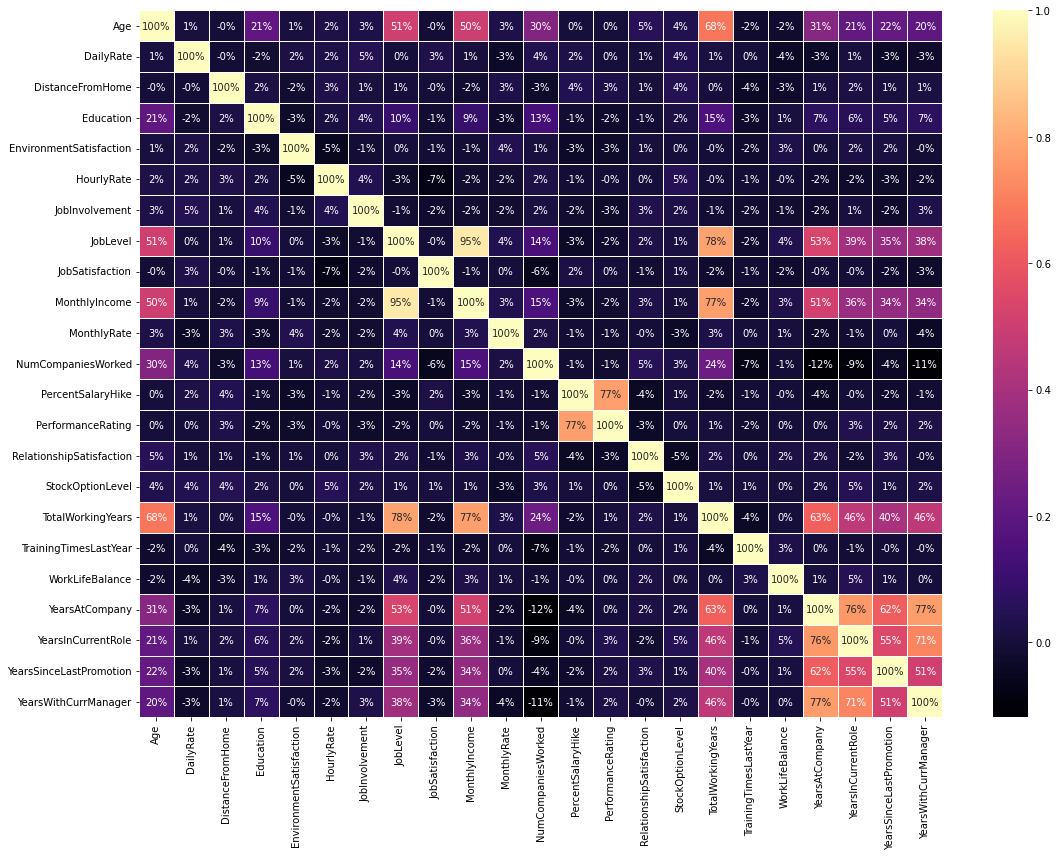

In [31]:
#correlation heatmap
plt.figure(figsize=(18,13))
sns.heatmap(df.corr(),annot=True,linewidths=1,cmap='magma', fmt='.0%')


Here we see the correlation :-

TotalWorkingYear having positive correlation

 - with Age that means there are are empl working from long time,
    
 - with monthly income means got hike on salaries as well because of long years in company

 - with yearsincurrentrole and currentmanager means when you working from long time on same role
 with same manager as well

PercentOfHike a correlation with PerfomanceRating means the perfomance helps to get hike.

In [32]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:xlabel='OverTime', ylabel='count'>

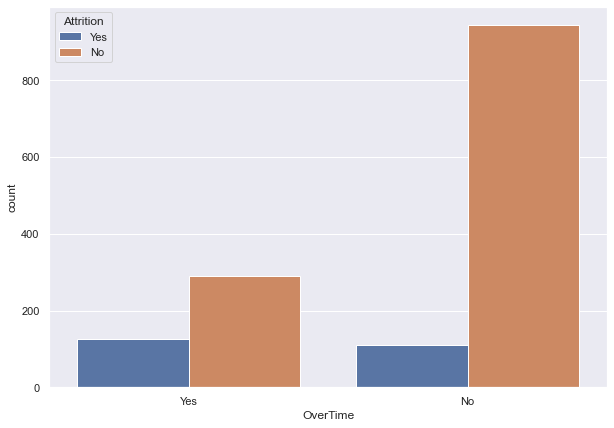

In [33]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='OverTime', hue='Attrition',data= df )

<AxesSubplot:xlabel='OverTime', ylabel='count'>

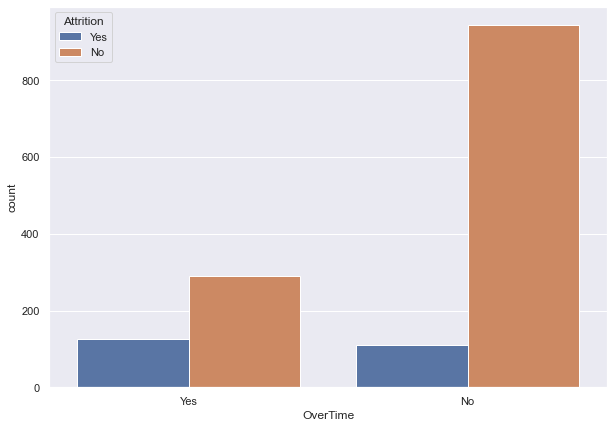

In [34]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='OverTime', hue='Attrition',data= df )

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

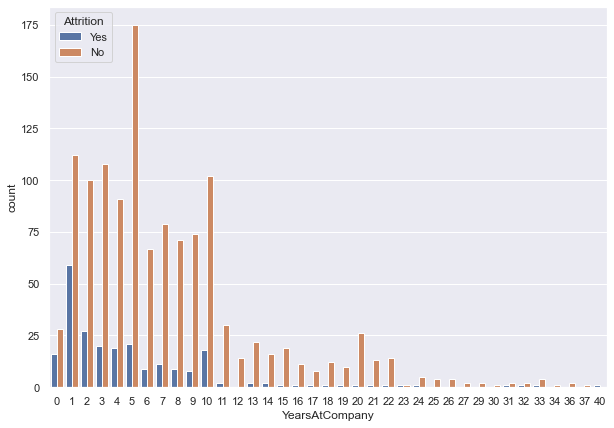

In [35]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='YearsAtCompany', hue='Attrition',data= df )

around 100 to 125 empl are working from 2, 3, 4 adn 11 year in company

around 175 empl are working from 5 years in company

very less no of empl are working from 10 year more


<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

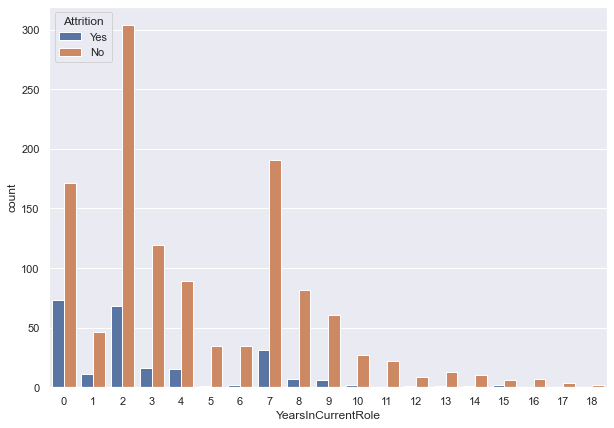

In [36]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='YearsInCurrentRole', hue='Attrition',data= df )

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

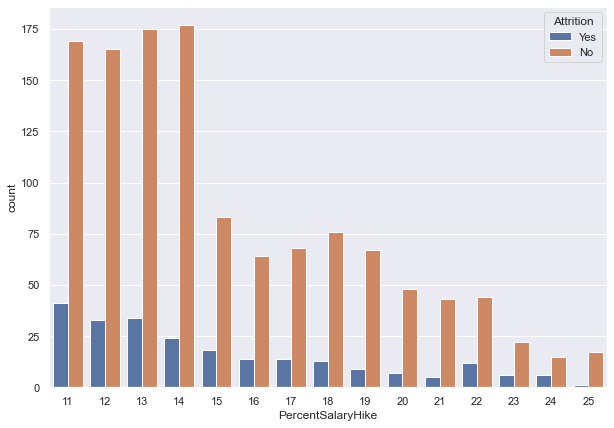

In [37]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='PercentSalaryHike', hue='Attrition',data= df )

most of hike given is 11,12,13,14 to maximum empl.

more than 15% hike given less empl must be working from very long

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

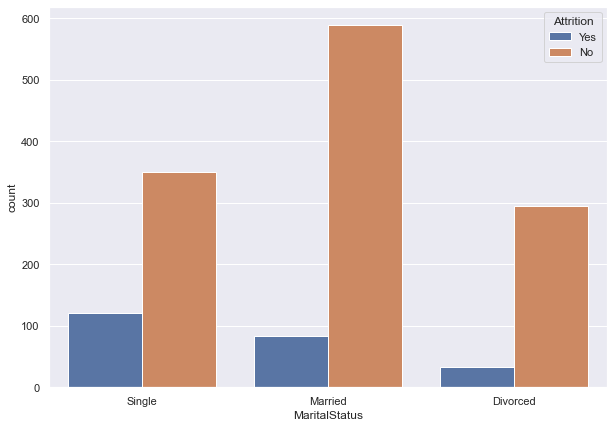

In [38]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='MaritalStatus', hue='Attrition',data= df )

<AxesSubplot:xlabel='Age', ylabel='count'>

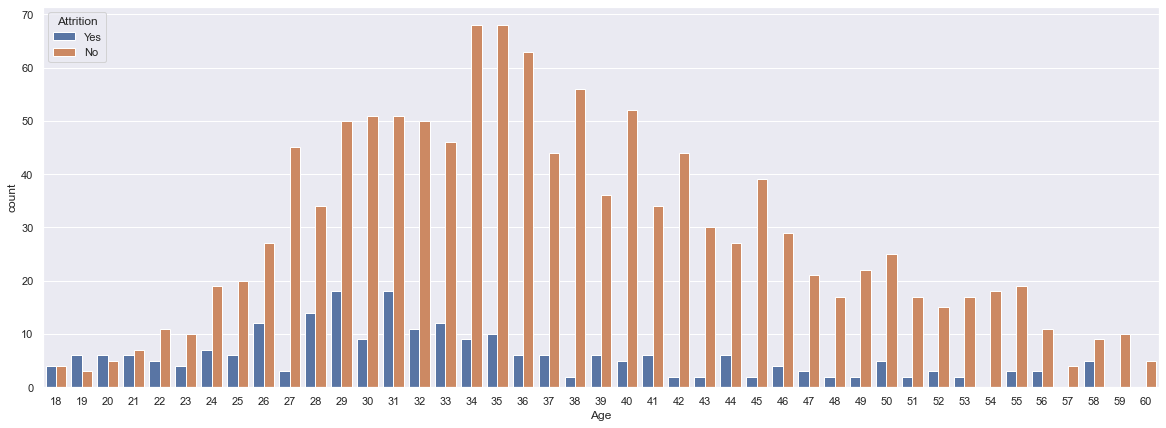

In [39]:
plt.figure(figsize=(20, 7))
sns.countplot(x='Age', hue='Attrition',data= df )

we can notice maximum no of employees are age of 34,35,36 those are working.
majority of employees are 27 to 45 of age those are working.
max of attrition are in age of 28,29,31. those are not workig anymore
in age of 18 of majority is same

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

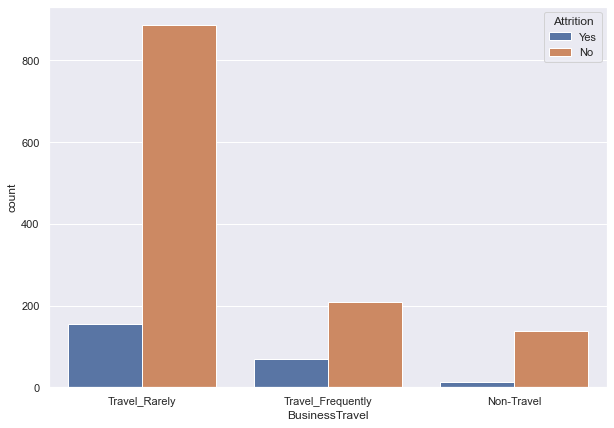

In [40]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='BusinessTravel', hue='Attrition',data= df )

max working are in Travel_Rarely category
In other two category we have very less employee
there is very less attrition in Non-Travel category


<AxesSubplot:xlabel='Department', ylabel='count'>

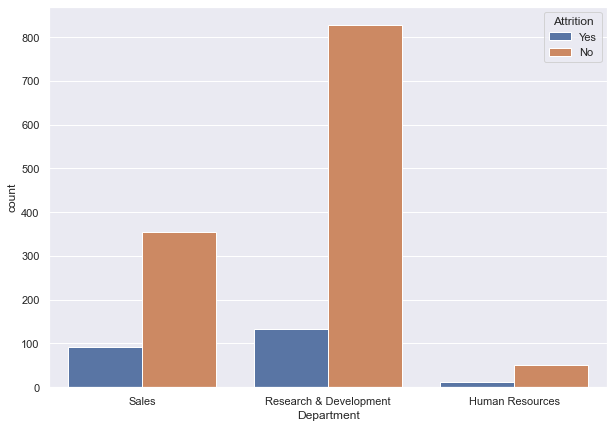

In [41]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='Department', hue='Attrition',data= df )

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

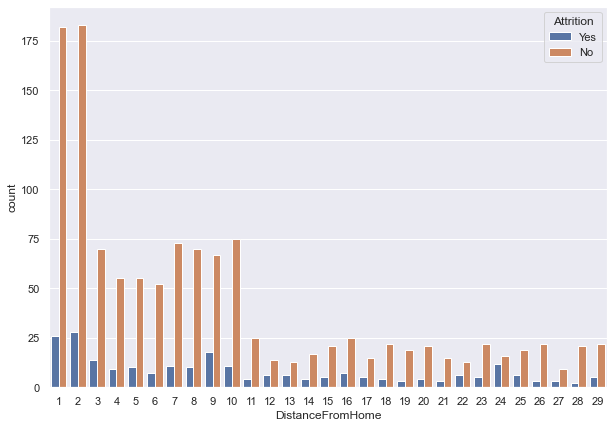

In [42]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='DistanceFromHome', hue='Attrition',data= df )

<AxesSubplot:xlabel='Education', ylabel='count'>

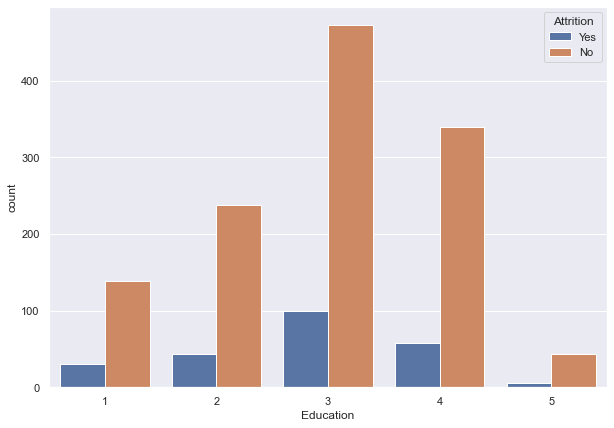

In [43]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='Education', hue='Attrition',data= df )

very less employees in higher education
most of emp are middle educated
Attrition is also high in middle educated empl.

<AxesSubplot:xlabel='Gender', ylabel='count'>

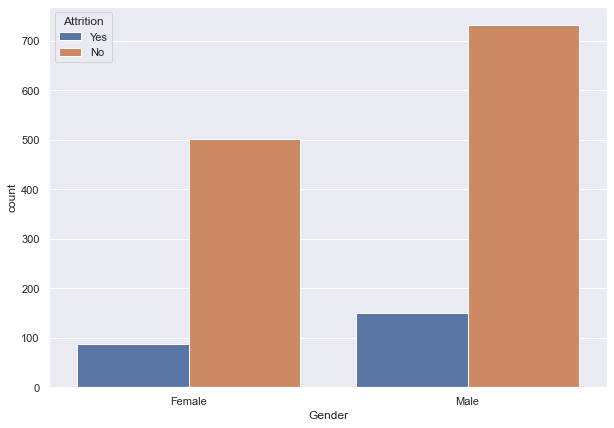

In [44]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='Gender', hue='Attrition',data= df )

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

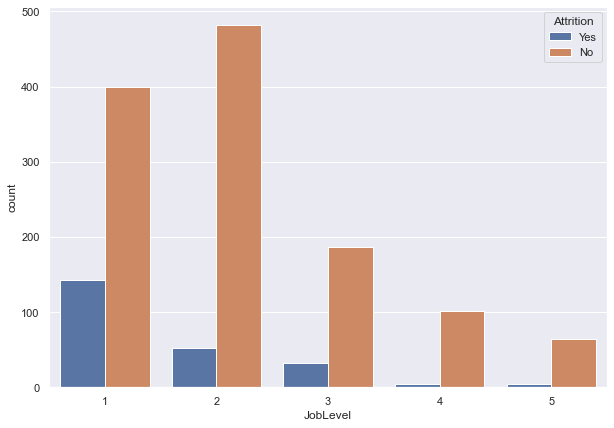

In [45]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='JobLevel', hue='Attrition',data= df )

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le=LabelEncoder()

list1= ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
    

In [48]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


# Skewness handling

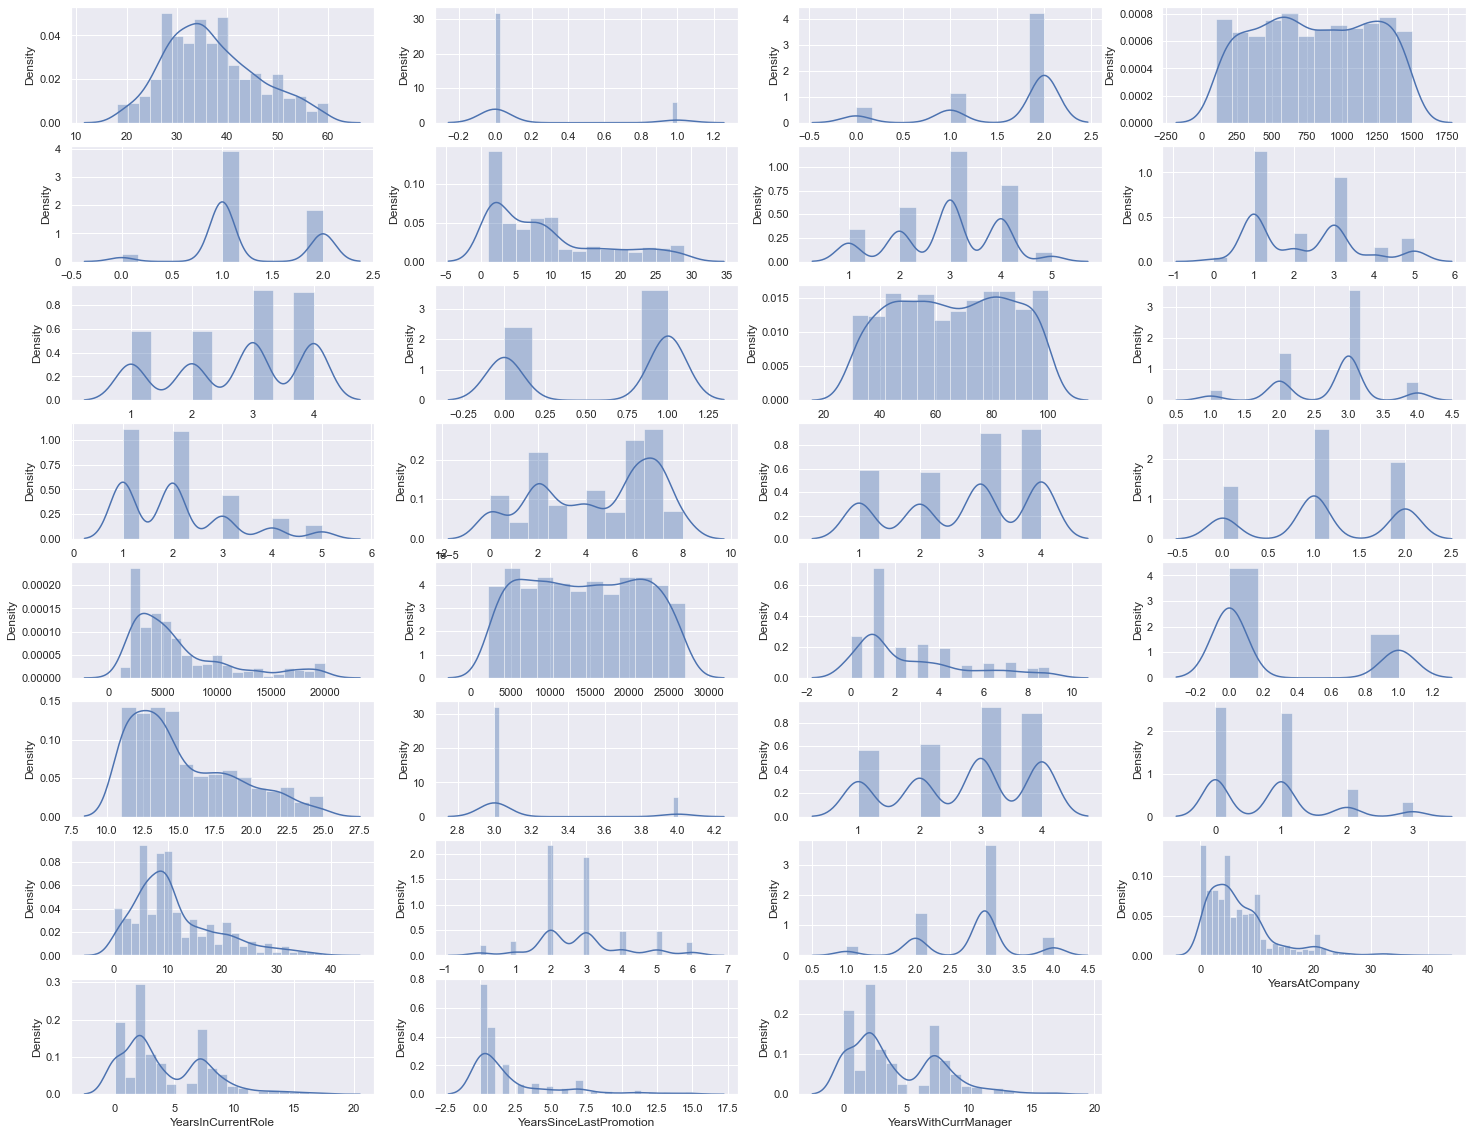

In [49]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]])

skewness more than+/- 0.5 will we treated
object and attrition columns will no be treated
we can see here most of the columns are skewed

will only deal with numercal columns

DistanceFromHome

EducationField

JobLevel

NumCompaniesWorked

NumCompaniesWorked

OverTime

PercentSalaryHike

StockOptionLevel

TotalWorkingYears

TrainingTimesLastYear

WorkLifeBalance

YearsAtCompany

YearsInCurrentRole

YearsWithCurrManager

will be treated

In [50]:
from sklearn.preprocessing import power_transform

df[['DistanceFromHome','EducationField','JobLevel','NumCompaniesWorked','NumCompaniesWorked','OverTime','PercentSalaryHike',
    'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany',
    'YearsInCurrentRole','YearsWithCurrManager']]=power_transform(
    df[['DistanceFromHome','EducationField','JobLevel','NumCompaniesWorked','NumCompaniesWorked','OverTime','PercentSalaryHike',
    'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany',
    'YearsInCurrentRole','YearsWithCurrManager']],method='yeo-johnson')

# Outliers Handling

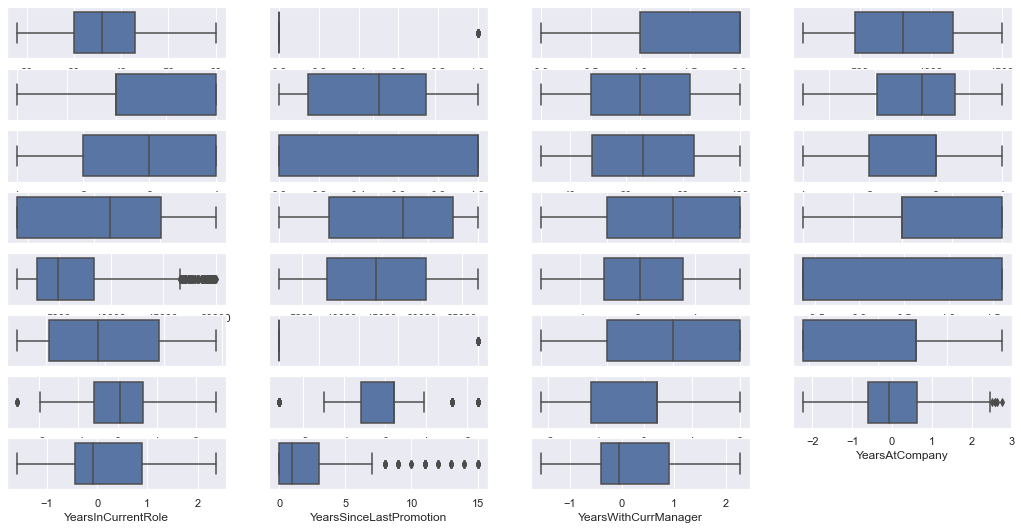

In [51]:
plt.figure(figsize=(18,10))
for i in enumerate(df):
    plt.subplot(9,4,i[0]+1)
    sns.boxplot(df[i[1]])

In [52]:
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))
a=np.array(z)
a

(array([  45,   62,   64,  110,  123,  126,  178,  218,  237,  326,  386,
        425,  427,  535,  584,  595,  653,  701,  752,  799,  838,  861,
        875,  914,  922,  926,  937,  976, 1008, 1078, 1086, 1093, 1138,
       1156, 1221, 1223, 1242, 1295, 1301, 1303, 1331, 1414]), array([29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29]))


array([[0.4463504 , 2.28090588, 0.59004834, ..., 0.2055623 , 0.67914568,
        0.49014719],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.883888  , 0.36871529,
        0.90963491],
       [0.008343  , 2.28090588, 0.59004834, ..., 1.59643394, 0.67914568,
        1.55015588],
       ...,
       [1.08667552, 0.4384223 , 0.59004834, ..., 0.44664507, 0.67914568,
        0.05300033],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.68299511, 0.67914568,
        1.09011007],
       [0.32016256, 0.4384223 , 0.59004834, ..., 0.08961473, 0.36871529,
        0.40688122]])

In [53]:
df1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df1.shape)

with outliers:: (1470, 31)
After removing outliers:: (1428, 31)


In [54]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR 

3.0

In [55]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(88, 31)


In [56]:
df=df1

In [57]:
x=df.drop(['Attrition'],axis=1)
y=df['Attrition']

In [58]:
x.shape

(1428, 30)

In [59]:
y.shape

(1428,)

In [60]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [61]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

In [62]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,...,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000
mean,0.443744,0.805322,0.501337,0.630252,0.470370,0.476891,0.599697,0.573063,0.600140,0.513075,...,0.153361,0.566527,0.378780,0.508412,0.535674,0.517572,0.447505,0.393421,0.168386,0.397300
std,0.215409,0.331567,0.288897,0.264420,0.315442,0.256468,0.235905,0.364934,0.490041,0.289727,...,0.360462,0.360612,0.348261,0.196710,0.207306,0.240835,0.197625,0.248437,0.235447,0.258274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.500000,0.260029,0.500000,0.146043,0.250000,0.372752,0.333333,0.000000,0.257143,...,0.000000,0.333333,0.000000,0.398284,0.414357,0.250040,0.336958,0.290529,0.000000,0.299693
50%,0.404762,1.000000,0.501074,0.500000,0.504637,0.500000,0.598918,0.666667,1.000000,0.514286,...,0.000000,0.666667,0.569763,0.499466,0.579282,0.584477,0.445124,0.380744,0.090909,0.392457
75%,0.571429,1.000000,0.755731,1.000000,0.738469,0.750000,0.763135,1.000000,1.000000,0.757143,...,0.000000,1.000000,0.569763,0.628193,0.579282,0.584477,0.588105,0.626729,0.181818,0.644798
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Imbalanced data

Using OverSamling_BorderlineSMOTE

because there is less data in attrition for yes

<AxesSubplot:xlabel='Attrition', ylabel='count'>

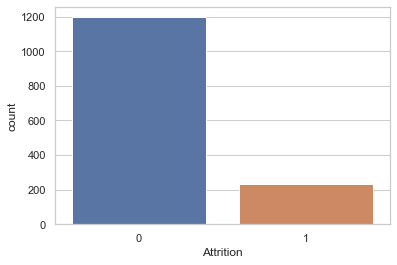

In [63]:
sns.set_style("whitegrid")
sns.countplot(x="Attrition", data=df)

We can see here Data is not fully balance but we'll treat the imbalace.
we have around 200 in yes and around 1200 in no.

In [64]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (1428,)
Resample Target dataset shape (2394,)


<AxesSubplot:xlabel='Attrition', ylabel='count'>

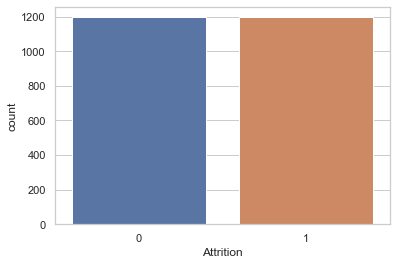

In [65]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

In [66]:
from sklearn.model_selection import train_test_split


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)


In [68]:
x_train.shape

(1747, 30)

In [69]:
x_test.shape

(647, 30)

In [70]:
y_train.shape

(1747,)

In [71]:
y_test.shape

(647,)

In [72]:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [73]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

cross validation score: 0.8241568469877099


In [74]:
print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.8330757341576507
[[268  57]
 [ 51 271]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       325
           1       0.83      0.84      0.83       322

    accuracy                           0.83       647
   macro avg       0.83      0.83      0.83       647
weighted avg       0.83      0.83      0.83       647

Training accuracy:: 0.8362907842014883
Test accuracy:: 0.8330757341576507


In [75]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.8500607087638997


In [76]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.8608964451313755
[[272  53]
 [ 37 285]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       325
           1       0.84      0.89      0.86       322

    accuracy                           0.86       647
   macro avg       0.86      0.86      0.86       647
weighted avg       0.86      0.86      0.86       647

Training accuracy:: 1.0
Test accuracy:: 0.8608964451313755


In [77]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.8220473266306201


In [78]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))


0.8284389489953632
[[223 102]
 [  9 313]]
              precision    recall  f1-score   support

           0       0.96      0.69      0.80       325
           1       0.75      0.97      0.85       322

    accuracy                           0.83       647
   macro avg       0.86      0.83      0.83       647
weighted avg       0.86      0.83      0.82       647

Training accuracy:: 0.8672009158557528
Test accuracy:: 0.8284389489953632


In [79]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.9315135262619998


In [80]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.9459041731066461
[[318   7]
 [ 28 294]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       325
           1       0.98      0.91      0.94       322

    accuracy                           0.95       647
   macro avg       0.95      0.95      0.95       647
weighted avg       0.95      0.95      0.95       647

Training accuracy:: 1.0
Test accuracy:: 0.9459041731066461


In [81]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.8923256624825662


In [82]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.9041731066460588
[[303  22]
 [ 40 282]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       325
           1       0.93      0.88      0.90       322

    accuracy                           0.90       647
   macro avg       0.91      0.90      0.90       647
weighted avg       0.91      0.90      0.90       647

Training accuracy:: 0.9290211791642816
Test accuracy:: 0.9041731066460588


In [83]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.909055090655509


In [84]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))


0.9041731066460588
[[309  16]
 [ 46 276]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       325
           1       0.95      0.86      0.90       322

    accuracy                           0.90       647
   macro avg       0.91      0.90      0.90       647
weighted avg       0.91      0.90      0.90       647

Training accuracy:: 0.9908414424728106
Test accuracy:: 0.9041731066460588


In [85]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.9174267782426778


In [86]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.919629057187017
[[311  14]
 [ 38 284]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       325
           1       0.95      0.88      0.92       322

    accuracy                           0.92       647
   macro avg       0.92      0.92      0.92       647
weighted avg       0.92      0.92      0.92       647

Training accuracy:: 0.9708070978820835
Test accuracy:: 0.919629057187017



ADA BOOST CLASSIFIER as final model
for HYPER PARAMETER TUNING because both train and test accuracies are pretty close and highest as well
Rest of the models having huge difference between train and test accuracies so not considering them.

In [87]:
adb=AdaBoostClassifier()
param_grid={
    'algorithm' : ['SAMME.R'],
    'n_estimators':[50,200,10],
    'learning_rate':[0.1,0.5,1.0],
     'random_state':[10]              
}
adb_grid=GridSearchCV(AdaBoostClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)
adb_grid.fit(x_train,y_train)
adb_pred=adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,adb_pred))

Fitting 4 folds for each of 9 candidates, totalling 36 fits
Accuracy after parameter tuning:: 0.9258114374034003


In [88]:
adb_grid.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.5,
 'n_estimators': 200,
 'random_state': 10}

In [89]:
best_param={
    'algorithm' : ['SAMME.R'],
    'n_estimators':[200],
    'learning_rate':[0.5],
     'random_state':[10]    }  
best_adb_grid=GridSearchCV(AdaBoostClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)
best_adb_grid.fit(x_train,y_train)
best_adb_pred=best_adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_adb_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.9258114374034003


In [90]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_adb_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       325
           1       0.96      0.89      0.92       322

    accuracy                           0.93       647
   macro avg       0.93      0.93      0.93       647
weighted avg       0.93      0.93      0.93       647



<AxesSubplot:>

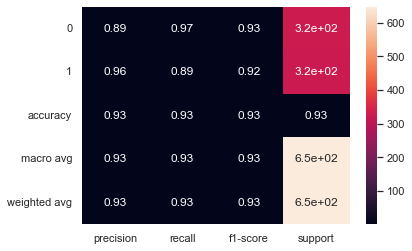

In [91]:
clsf_repo = classification_report(y_test,best_adb_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [92]:
from sklearn.metrics import roc_auc_score


In [93]:
print("roc auc score::",roc_auc_score(y_test, best_adb_pred))

roc auc score:: 0.9256235069278548


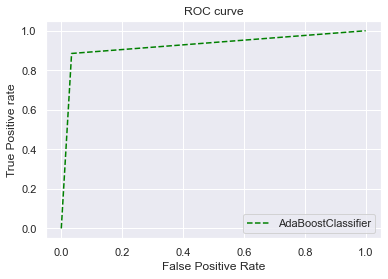

In [94]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, best_adb_pred, pos_label=1)
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='AdaBoostClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [95]:
import joblib
joblib.dump(best_adb_grid.best_estimator_,'HR Analytics Project.obj')

['HR Analytics Project.obj']

In [96]:
import pickle
filename = 'hr-project.pkl'
pickle.dump(adb, open(filename,'wb'))